# MNIST Classification using Fully Connected Neural Nets

This is a learning implementation based on [this article](https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3). We use Keras API, from which the composite elements of the MLP comes readily implemented. 

In [ ]:
import tensorflow as tf

Load the MNIST dataset. 

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test: uint8 arrays of grayscale image data with shapes  (num_samples, 28, 28).  
# y_train, y_test: uint8 arrays of digit labels (integers in range 0-9) with shapes (num_samples,).  
print('x_train (training data) dimensions: ', x_train.shape)
print('x_test (test data) dimensions: ', x_test.shape)
print('y_train (training labels) dimensions: ', y_train.shape)
print('y_test (test labels) dimensions: ', y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train (training data) dimensions:  (60000, 28, 28)
x_test (test data) dimensions:  (10000, 28, 28)
y_train (training labels) dimensions:  (60000,)
y_test (test labels) dimensions:  (10000,)


Fully connected neural nets expect 1D vectors as inputs. Reshape the 2D images.

In [ ]:
image_vector_length = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0],image_vector_length)
x_test = x_test.reshape(x_test.shape[0], image_vector_length)
print('x_train reshaped dimensions: ', x_train.shape)
print('x_test reshaped dimensions: ', x_test.shape)

x_train reshaped dimensions:  (60000, 784)
x_test reshaped dimensions:  (10000, 784)


The output of this classification net is categories. The miscategorization from a number to another is equally erroneous, whether the wrong number is close to or far away from the right number in value. Therefore we transform training and test labels from numbers to one-hot encoded vectors.

In [ ]:
num_classes = 10;
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

We construct a fully-connected multilayer perception (MLP) with one hidden layer of 32 elements, each is a sigmoid function. The input layer is the reshaped vector of length image_vector_length. The output layer is a 10-element softmax.  

In [ ]:
num_elements_l1 = 32 # layer 1, counting from but excluding input
num_elements_l2 = 10 

mlp = tf.keras.Sequential()
mlp.add(tf.keras.Input(shape=(image_vector_length,)))
mlp.add(tf.keras.layers.Dense(units=num_elements_l1, activation='sigmoid'))
mlp.add(tf.keras.layers.Dense(units=num_elements_l2, activation='softmax'))
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


Set up the MLP for training, train, plot results.

In [ ]:
mlp.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = mlp.fit(x_train, y_train, batch_size=128, epochs=5, verbose=True, validation_split=0.1)
loss, accuracy = mlp.evaluate(x_test, y_test, verbose=True)

Epoch 1/5
422/422 [==============================] - 1s 3ms/step - loss: 1.3489 - accuracy: 0.6601 - val_loss: 0.9116 - val_accuracy: 0.8313
Epoch 2/5
422/422 [==============================] - 1s 2ms/step - loss: 0.8319 - accuracy: 0.8310 - val_loss: 0.6689 - val_accuracy: 0.8768
Epoch 3/5
422/422 [==============================] - 1s 2ms/step - loss: 0.6590 - accuracy: 0.8621 - val_loss: 0.5465 - val_accuracy: 0.8943
Epoch 4/5
422/422 [==============================] - 1s 2ms/step - loss: 0.5669 - accuracy: 0.8751 - val_loss: 0.4789 - val_accuracy: 0.8988
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.8934


In [ ]:
history.history

{'accuracy': [0.6600555777549744,
  0.8309999704360962,
  0.8620926141738892,
  0.8750555515289307,
  0.883814811706543],
 'loss': [1.348915696144104,
  0.8318608403205872,
  0.6589789390563965,
  0.5668712258338928,
  0.5068874955177307],
 'val_accuracy': [0.831333339214325,
  0.8768333196640015,
  0.8943333625793457,
  0.8988333344459534,
  0.909166693687439],
 'val_loss': [0.911607027053833,
  0.6688682436943054,
  0.5464733839035034,
  0.4788651466369629,
  0.4344545602798462]}

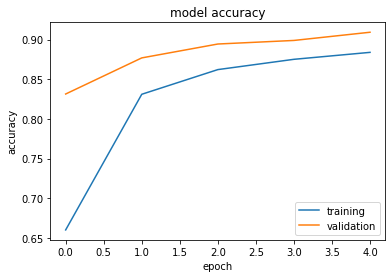

Test loss: 0.472
Test accuracy: 0.893


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')